# T- test
- for the normal data

In [1]:
import seaborn as sns 
import pandas  as pd
import numpy as np

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [4]:
#df=df.dropna(subset=['age'], axis=0, inplace=True)

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

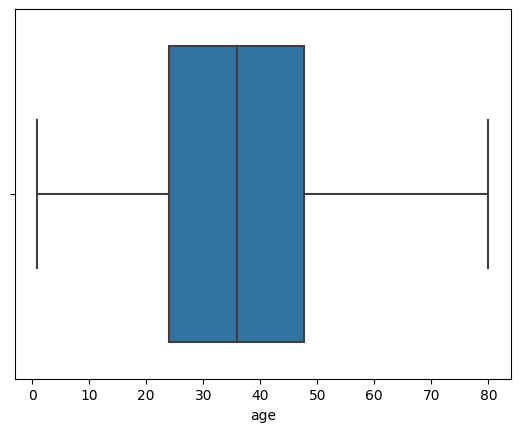

In [8]:
sns.boxplot(df['age'])

In [9]:
df=df[['sex','class', 'age','fare']]
df.head()

,sex,class,age,fare
1,female,First,38.0,71.2833
3,female,First,35.0,53.1000
6,male,First,54.0,51.8625
10,female,Third,4.0,16.7000
11,female,First,58.0,26.5500


In [10]:
df.columns

Index(['sex', 'class', 'age', 'fare'], dtype='object')

In [11]:
# t- test unpaired t test
from scipy.stats import ttest_ind 
df_male=df[df['sex']=='male']
df_female=df[df['sex']=='female']
 
ttest_ind(df_male['age'], df_female['age'])
stat, p_value= ttest_ind(df_male['age'], df_female['age'])
print('stat=', stat,'p=', p_value )
if p_value > 0.05:
    print('There is no signficent diff')
else:
    print('There is signficent diff')
    

stat= 2.489633677263818 p= 0.013694621743592653
There is signficent diff


In [12]:
# One sample t- test
from scipy.stats import ttest_1samp
df_male=df[df['sex']=='male']
df_female=df[df['sex']=='female']
 
ttest_1samp(df_male['age'], 55)
stat, p_value= ttest_1samp(df_male['age'],55)
print('stat=', stat,'p=', p_value )
if p_value > 0.05:
    print('There is no signficent diff')
else:
    print('There is signficent diff')

stat= -9.762413987356023 p= 6.508194404046963e-16
There is signficent diff


In [13]:
df['class'].value_counts()

First     157
Second     15
Third      10
Name: class, dtype: int64

In [14]:
from scipy.stats import ttest_rel
first_cls=df[df['class']=='First']
third_cls=df[df['class']=='Third']
 
ttest_rel(first_cls['class'], third_cls['class'])
stat, p_value=ttest_rel(first_cls['class'], third_cls['class'])
print('stat=', stat,'p=', p_value )
if p_value > 0.05:
    print('There is no signficent diff')
else:
    print('There is signficent diff')

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


ValueError: unequal length arrays

In [15]:
# shapiro
from scipy.stats import shapiro
stat, p= shapiro(df['age'])
print('stat=', stat, 'p=', p)
if p > 0.05:
    print ('The data is normal\Gassian')
else:
    print ('The data is not normal\Gassian')

stat= 0.9906663298606873 p= 0.28415897488594055
The data is normal\Gassian


c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

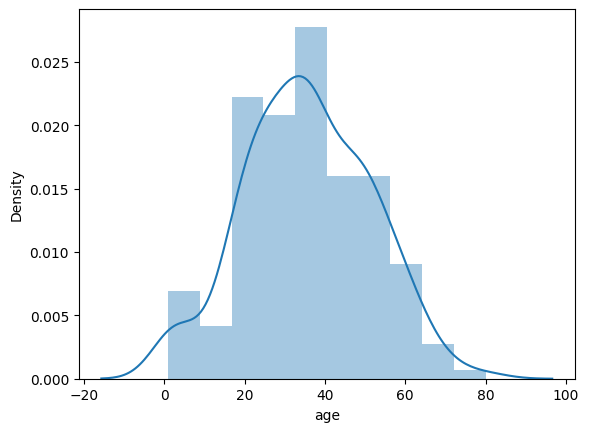

In [16]:
sns.distplot(df['age'])

In [17]:
# t- test unpaired t test ( for normal data)
from scipy.stats import ttest_ind 
df_male=df[df['sex']=='male']
df_female=df[df['sex']=='female']
 
ttest_ind(df_male['age'], df_female['age'])
stat, p_value= ttest_ind(df_male['age'], df_female['age'])
print('stat=', stat,'p=', p_value )
if p_value > 0.05:
    print('There is no signficent diff')
else:
    print('There is signficent diff')

stat= 2.489633677263818 p= 0.013694621743592653
There is signficent diff
